# Objective

* Predict whether the customer ( Applicant ) loan will be Reject ( Bad ) or Approved ( Good )

* Yes = loan Reject , No =loan approved

In [1]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import os
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

################# visualization #################
import matplotlib.pyplot as plt 
from PIL import  Image
import seaborn as sns 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

# 1. Data Importing

In [2]:
import pandas as pd
churn = pd.read_csv (r"C:\Users\Arjun Walunj\Downloads\churn.csv")

#first few rows
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 2. Data Pre-Processing 

1. Data Type and conversion
2. Identifying & Treatment Missing Value 

#### 2.1. Data Type and conversion

In [3]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### 2.2. Identifying & Treatment Missing Value

In [4]:
churn.loc[churn.TotalCharges==0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer,52.55,0.0,No
753,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No
936,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No
1082,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No
1340,1371-DWPAZ,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card,56.05,0.0,No
3331,7644-OMVMY,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,No
3826,3213-VVOLG,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No
4380,2520-SGTTA,Female,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No
5218,2923-ARZLG,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,No
6670,4075-WKNIU,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0,No


In [5]:
churn.TotalCharges=churn.TotalCharges.astype(float)      

In [6]:
# count the number of NaN values in each column
churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
#Tenure to categorical column
def tenure_lab(churn) :
    if churn["tenure"] <= 6 :
        return "Tenure_0_6"
    elif (churn["tenure"] > 6) & (churn["tenure"] <= 12 ):
        return "Tenure_7_12"
    elif (churn["tenure"] > 12) & (churn["tenure"] <= 24) :
        return "Tenure_13_24"
    elif (churn["tenure"] > 24) & (churn["tenure"] <= 36) :
        return "Tenure_25-36"
    elif churn["tenure"] > 36 :
        return "Tenure_gt_36"
# banK = x
churn["Tenure_group"] = churn.apply(lambda x :tenure_lab(x),axis = 1)

In [8]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_group
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Tenure_0_6
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Tenure_25-36
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Tenure_0_6
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,No,Tenure_gt_36
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Tenure_0_6


<AxesSubplot:xlabel='tenure'>

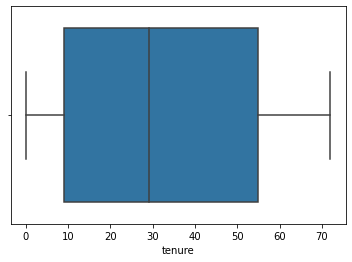

In [9]:
sns.boxplot(churn.tenure)

In [10]:
churn.Tenure_group.value_counts(dropna=False)

Tenure_gt_36    3001
Tenure_0_6      1481
Tenure_13_24    1024
Tenure_25-36     832
Tenure_7_12      705
Name: Tenure_group, dtype: int64

In [11]:
((3001+1024+832)/7043)*100

68.96209001845804

* 80% of customer required loan tenure for more than a Year

# Data Visualization

#### Bad Rate Analysis 

In [12]:
churn.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [13]:
(1869/7043)*100 # 27% is bad rate in data 

26.536987079369588

In [14]:
import plotly.express as px

fig = px.pie(churn,names='Churn',color='Churn',
             color_discrete_map={'Yes':'red',
                                 'No':'green'})
fig.show()

### Reject customer data  = Bad Customer

In [15]:
churn_Yes= churn[churn["Churn"] == "Yes"]  # 269

churn_Yes

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_group
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Tenure_0_6
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Tenure_0_6
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,Tenure_7_12
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,Tenure_25-36
13,0280-XJGEX,Male,No,No,No,49,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer,103.70,5036.30,Yes,Tenure_gt_36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1699-HPSBG,Male,No,No,No,12,Yes,No,DSL,No,...,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes,Tenure_7_12
7026,8775-CEBBJ,Female,No,No,No,9,Yes,No,DSL,No,...,No,No,No,Month-to-month,Yes,Bank transfer,44.20,403.35,Yes,Tenure_7_12
7032,6894-LFHLY,Male,Yes,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes,Tenure_0_6
7034,0639-TSIQW,Female,No,No,No,67,Yes,Yes,Fiber optic,Yes,...,No,Yes,No,Month-to-month,Yes,Credit card,102.95,6886.25,Yes,Tenure_gt_36


In [16]:
fig = px.sunburst(churn_Yes, path=["gender",'SeniorCitizen','Contract',
                                    'Tenure_group','PaymentMethod'])
fig.show()

### Interpetation : - Trend Analysis
* Customer ==  Male,Graduate,salaried & Tenure  less than a year , Rural   == Loan Rejected 
* customer ==  Male,Graduate,salaried & Tenure  less than a year ,Urban   == Loan Rejected 
* customer ==  Female,Graduate,salaried & Tenure <= 6 Months ,Rural    == Loan Rejected 



# 5. Breaking Data into Two Part
 * Quantitative Variable
 * Qualitative Variable
 


In [17]:
churn=churn.drop('customerID',axis=1)
churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_group
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Tenure_0_6
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Tenure_25-36
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Tenure_0_6
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,No,Tenure_gt_36
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Tenure_0_6


In [18]:
churn.select_dtypes(include=[np.number]).columns.tolist()

['tenure', 'MonthlyCharges', 'TotalCharges']

In [19]:
# Qualitative Variable
Quantitative_Variable = churn[churn.select_dtypes(include=[np.number]).columns.tolist()]
Quantitative_Variable.head(3)

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15


In [20]:
Qualitative_Variable = churn[churn.select_dtypes(include=['object']).columns.tolist()]
Qualitative_Variable.head(3)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,Tenure_group
0,Female,No,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No,Tenure_0_6
1,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,Tenure_25-36
2,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,Tenure_0_6


### Converting qualitative Variable into number

In [21]:
from sklearn.preprocessing import LabelEncoder
Qualitative_Variable=Qualitative_Variable.apply(LabelEncoder().fit_transform) # label in ascending order
Qualitative_Variable.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,Tenure_group
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,0
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,2
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,0
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,4
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,0


## Combining the data set 

In [22]:
Final_combined = pd.concat([Qualitative_Variable, Quantitative_Variable],axis=1)
Final_combined.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,Tenure_group,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,2,0,...,0,0,0,1,2,0,0,1,29.85,29.85
1,1,0,0,0,1,0,0,2,0,2,...,0,0,1,0,3,0,2,34,56.95,1889.50
2,1,0,0,0,1,0,0,2,2,0,...,0,0,0,1,3,1,0,2,53.85,108.15
3,1,0,0,0,0,1,0,2,0,2,...,0,0,1,0,0,0,4,45,42.30,1840.75
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,2,1,0,2,70.70,151.65


# Data Partition 

In [23]:
from sklearn.model_selection import train_test_split

# define our input variable (X) & output variable
X = Final_combined.drop('Churn', axis = 1)
Y = Final_combined[['Churn']]
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=56)

# Model building 

# Hypothesis

* H0 :- There is no log linear relationship between Loan_Status and all independent Variable

Vs 

* H1 :- There is log linear relationship between Loan_Status and all independent Variable

Alpha = 0.05 (5%)

# Method 1 - Logistics Regression

#Needed to run the logistic regression
import statsmodels.formula.api as smf
result=smf.logit("Loan_Status~C(Gender)+C(Married)+C(Education)+C(Self_Employed)+C(Previous_Loan_Taken)+C(Property_Area)+C(Customer_Bandwith)+C(Tenure_group)+Age+Dependents+LoanAmount+Cibil_Score+ApplicantIncome",data=train).fit()
print(result.summary2())

# Method 2 - Logistics Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
output=logreg.fit(X_train, y_train) # model

In [25]:
output.intercept_  # beto 

array([-0.25737367])

In [26]:
output.coef_  # Beta 1 -- 

array([[-9.14299583e-02,  2.69028734e-01, -6.72217719e-02,
        -2.77336410e-01, -4.61209432e-01,  6.63179770e-02,
         5.74324466e-02, -2.69647802e-01, -1.03193007e-01,
        -4.45990001e-02, -2.65151306e-01,  2.18914380e-02,
         1.04109469e-01, -7.71110200e-01,  3.55567726e-01,
        -8.55798408e-02, -2.26489276e-02, -5.59746483e-02,
         1.69227481e-02,  2.87890587e-04]])

In [27]:
output.n_features_in_

20

In [28]:
output.feature_names_in_

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Tenure_group', 'tenure', 'MonthlyCharges', 'TotalCharges'],
      dtype=object)

* We Reject Ho
* There is log linear relationship between Loan_Status and Married,Previous_Loan_Taken,Customer_Bandwith,Cibil_Score

# Step 6 : Predictions on Train Dataset

In [29]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Tenure_group,tenure,MonthlyCharges,TotalCharges,Churn
7011,0,0,0,0,1,0,0,2,2,0,...,0,0,0,1,3,0,4,60.40,272.15,1
3323,0,0,0,1,1,0,2,1,1,1,...,1,1,0,0,3,2,28,20.25,535.35,0
4102,1,0,1,1,1,0,0,0,0,0,...,0,0,0,0,2,3,7,44.75,333.65,0
4234,0,0,0,0,1,0,2,1,1,1,...,1,1,1,0,3,1,16,19.05,326.65,0
3610,0,0,0,0,1,2,1,0,0,2,...,2,2,0,1,0,3,12,100.15,1164.30,1


In [30]:
train['Predicted']=output.predict(X_train)
train.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Tenure_group,tenure,MonthlyCharges,TotalCharges,Churn,Predicted
7011,0,0,0,0,1,0,0,2,2,0,...,0,0,1,3,0,4,60.40,272.15,1,0
3323,0,0,0,1,1,0,2,1,1,1,...,1,0,0,3,2,28,20.25,535.35,0,0
4102,1,0,1,1,1,0,0,0,0,0,...,0,0,0,2,3,7,44.75,333.65,0,0
4234,0,0,0,0,1,0,2,1,1,1,...,1,1,0,3,1,16,19.05,326.65,0,0
3610,0,0,0,0,1,2,1,0,0,2,...,2,0,1,0,3,12,100.15,1164.30,1,1


train['Predicted']=np.where(train['Probability'] >= 0.7,1,0) 
train.head()

# Step 7 : Model Performance Metrics

In [31]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(train['Predicted'], train['Churn'])
matrix

array([[3675,  669],
       [ 463,  827]], dtype=int64)

In [32]:
Accuracy_Train=((3675+827)/(7043)*100)
print(Accuracy_Train)

63.921624307823365


* Accuracy of Model is 78% , So we say Model good fit data  

In [33]:
from sklearn.metrics import classification_report
print(classification_report(train['Churn'],train['Churn']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4138
           1       1.00      1.00      1.00      1496

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634



* Accuracy of  Model is 76%,Hence Model is good Fit 
* Accuracy of Bad Customer Capture by Model is 19% ( Sensitivity )
* Accuracy of Good Customer Capture by Model is 99% (Specificity)

# Step 8 : Predictions on Test Dataset

In [34]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Tenure_group,tenure,MonthlyCharges,TotalCharges,Churn
6046,0,0,0,0,1,0,1,0,0,2,...,0,2,0,1,1,3,9,85.3,781.40,0
6494,0,0,0,1,0,1,0,0,0,2,...,0,0,0,1,3,2,26,29.8,786.50,0
2702,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,2,0,1,44.0,44.00,0
1532,1,0,0,0,1,0,2,1,1,1,...,1,1,0,0,1,1,14,19.6,300.40,0
3999,0,1,0,0,1,0,1,0,0,0,...,0,0,0,1,2,0,2,69.6,131.65,1


In [35]:
test['Predicted']=output.predict(X_test)
test.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Tenure_group,tenure,MonthlyCharges,TotalCharges,Churn,Predicted
6046,0,0,0,0,1,0,1,0,0,2,...,2,0,1,1,3,9,85.3,781.40,0,1
6494,0,0,0,1,0,1,0,0,0,2,...,0,0,1,3,2,26,29.8,786.50,0,0
2702,1,0,0,0,1,0,0,0,0,0,...,0,0,0,2,0,1,44.0,44.00,0,0
1532,1,0,0,0,1,0,2,1,1,1,...,1,0,0,1,1,14,19.6,300.40,0,0
3999,0,1,0,0,1,0,1,0,0,0,...,0,0,1,2,0,2,69.6,131.65,1,1


test['']=np.where(test['Probability'] >= 0.7,1,0) 
test.head()

# Step 9 : Model Performance Metrics on Test data 

In [36]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test['Predicted'],test['Churn'])
print(matrix)

[[939 166]
 [ 97 207]]


In [37]:
Accuracy_test=((939 +207)/(1409)*100)
Accuracy_test

81.33427963094393

In [38]:
from sklearn.metrics import classification_report
print(classification_report(test['Churn'],test['Predicted']))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.55      0.61       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.74      1409
weighted avg       0.81      0.81      0.81      1409



* Accuracy of  Model is 81%,Hence Model is good Fit 
* Accuracy of Bad Customer Capture by Model is 55% ( Sensitivity )
* Accuracy of Good Customer Capture by Model is 91% 

# Coefficient 

* For future Prediction below 4 variable data is mandatory 

* Note :- If anyone is not present output will not be reliable 

In [39]:
Model_Values=pd.DataFrame(output.intercept_,index=['Intercept'],columns=['Coefficient'])
Model_Values

,Coefficient
Intercept,-0.257374


In [42]:
rows=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Tenure_group', 'tenure', 'MonthlyCharges', 'TotalCharges']

abc=pd.DataFrame(output.coef_.T,index=rows,columns=['Coefficient'])
abc

,Coefficient
gender,-0.091430
SeniorCitizen,0.269029
Partner,-0.067222
Dependents,-0.277336
PhoneService,-0.461209
MultipleLines,0.066318
InternetService,0.057432
OnlineSecurity,-0.269648
OnlineBackup,-0.103193
DeviceProtection,-0.044599


In [43]:
Model_Values.append(abc)

,Coefficient
Intercept,-0.257374
gender,-0.091430
SeniorCitizen,0.269029
Partner,-0.067222
Dependents,-0.277336
PhoneService,-0.461209
MultipleLines,0.066318
InternetService,0.057432
OnlineSecurity,-0.269648
OnlineBackup,-0.103193


# Finish